# Исследование продаж компьютерных игр

Я работаю в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Мне нужно выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать будущие рекламные кампании.

#### План проекта:

[Шаг 1. Открытие файла с данными и изучение общей информации](#1)

[Шаг 2. Подготовка данных:](#2)


   [а. Замена названия столбцов (приведение к нижнему регистру);](#3)  
   [б. Преобразование данных в нужные типы;](#4)  
   [в. Обработка пропусков;](#5)  
   [г. Подсчет суммарных продаж во всех регионах.](#6)  

[Шаг 3. Проведение исследовательского анализа данных:](#7)

   [а. Подсчет количества игр, выпущенных в разные годы;](#8)  
   [б. Исследование изменения продаж по платформам.](#9)  
   [в. Определение актуального периода, данные которого помогут построить прогноз на 2017 год. Исследование данных за актуальный период;](#10)  
   [г. Выбор нескольких потенциально прибыльных платформ;](#11)  
   [д. Определение влияния отзывов пользователей и критиков на продажи внутри одной популярной платформы;](#12)  
   [е. Рассмотрение распределения игр по жанрам.](#13)  
    
  [Шаг 4. Составление портрета пользователя каждого региона
   Определение для пользователя каждого региона (NA, EU, JP):](#14)

  -[Самых популярных платформ (топ-5).](#15)  
  -[Самых популярных жанров (топ-5).](#16)  
  -[Влияние рейтинга ESRB на продажи в отдельном регионе](#17)  

[Шаг 5. Проверка гипотез:](#18)

   [а. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;](#19)  
   [б. Средние пользовательские рейтинги жанров Action и Sports разные.](#20)  

[Шаг 6. Общий вывод.](#21)

<a name="1"></a>
 ## Шаг 1. Открытие файла с данными и изучение общей информации  <a name="abcd"></a>

In [1]:
#Импортирую необходимые мне в исследовании библиотеки:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
#Код, чтобы не высвечивались предупреждения:
pd.set_option('mode.chained_assignment', None)
#Прочитаю файл с помощью метода read():
df = pd.read_csv('/datasets/games.csv')
display(df)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В моем распоряжении файл в формате csv в виде таблицы с данными о компьютерных играх. Столбцы таблицы содержат информацию о названии игр, платформамах, годах выпуска, жанре, продажах в Северной Америке, Европе, Японии, оценке критиков, оценке пользователей, рейтинге от организации ESRB. При первом взгляде на таблицу можно обнаружить пропущенные значения в столбцах с данными года выпуска, оценки критиков, пользовательской оценки и рейтинга. Остальные особенности я обнаружу и предобработаю, где это уместно, в дальнейшем исследовании.

 <a name="2"></a>
## Шаг 2. Подготовка данных

Ознакомлюсь с данными с помощью метода describe() с аргументом include = ['object'] для изучения категориальных значений.

In [3]:
df.describe(include = ['object'])

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


Получу информацию о данных таблицы методом info():

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<a name="3"></a>
#### Замена названия столбцов

Приведу к нижнему регистру названия столбцов:

In [5]:
df.columns = df.columns.str.lower()
display(df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<a name="4"></a>
#### Преобразование типа данных

Переведу из вещественного в целочисленный тип значения столбца year_of_release, так как года могут иметь только 
целое значение, а тип даты здесь не особо нужен - нас не интересуют конкретные дни, месяца или время продаж.

In [6]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

Проверю таблицу на наличие дубликатов:

In [7]:
df.duplicated().sum()

0

In [8]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Аббревиатура 'tbd' в столбце user_score расшифровывается как 'to be determined' и означает, что рейтинг вскоре будет определен, но пока его нет. Поменяю 'tbd' на nan, затем переведу столбец в формат float, так как формат object не подразумевает работу с числами.

In [9]:
#С помощью метода replace() заменю значения 'tbd' на nan:
df['user_score'] = df['user_score'].replace('tbd', np.nan, regex = True)
#Методом astype переведу значения столбца в вещественный тип:
df['user_score'] = df['user_score'].astype('float')

<a name="5"></a>
#### Обработка пропусков

Заполню пропуски в столбцах user_score и critic_score на медианные значения этих столбцов, сперва найдя медиану методом median():

In [10]:
user_score_median = df['user_score'].median()
df['user_score'] = df['user_score'].fillna(user_score_median)

critic_score_median = df['critic_score'].median()
df['critic_score'] = df['critic_score'].fillna(critic_score_median)
display(df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.5,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.0,7.5,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,7.5,NaN


Найду медианное значение года выхода игр, сгруппировав их по названию и создам функцию для заполнения неизвестных значений столбца year_of_release медианными значениями:

In [11]:
median_year_of_release = df.groupby('name')['year_of_release'].median().round()

def function(row):
    if pd.isna(row['year_of_release']):
        return median_year_of_release[row['name']]
    return row['year_of_release']
df['year_of_release'] = df.apply(function, axis = 1)

print(median_year_of_release.unique())
display(df['year_of_release'])


[2016. 2015. 2013. 2012. 1998. 2006. 2007. 2002. 2010. 2003. 2000. 2008.
 1999. 2009. 2011. 2014. 2005. 1985. 2004. 1996. 1995. 1984. 2001. 1997.
 1994. 1982.   nan 1986. 1989. 1981. 1991. 1992. 1993. 1990. 1980. 1987.
 1983. 1988.]


0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16710    2016.0
16711    2006.0
16712    2016.0
16713    2003.0
16714    2016.0
Name: year_of_release, Length: 16715, dtype: float64

Посчитаю количество пропусков в столбце year_of_release после замены nan на медианное значение после группировки по названию:

In [12]:
display(df['year_of_release'].isna().sum())

146

In [13]:
df['year_of_release'] = np.trunc(df['year_of_release']).astype('Int64')

Заполнила пропуски в столбцах user_score и critic_score на медианные значения, а в столбце year_of_release - на медианное значение, сгруппировав по названию. К сожалению, в столбце year_of_release не все пропуски удалось заменить, а только 123 из 269, так как у некоторых игр с одинаковым названием ни разу не была указана дата выхода. Выбрала такой способ заполнения, потому как он мне показался уместным, пробовала выше другие способы, но у меня не получилось.

<a name="6"></a>
#### Подсчет суммарных продаж во всех регионах

Создам столбец sales_total с суммарными продажами во всех регионах:

In [14]:
df['sales_total'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

display(df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.5,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.0,7.5,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,7.5,NaN,0.01


<a name="7"></a>
## Шаг 3. Исследовательский анализ данных


<a name="8"></a>
#### Подсчет количества игр, выпущенных в разные годы

Методом pivot_table создам сводную таблицу, в которой столбцы будут содержать данные о годах и количестве игр, 
выпущенных в эти года:

In [15]:
df_year = df.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
#Переименую столбец name в games_count:
df_year = df_year.rename(columns = {'name': 'games_count'})
display(df_year)

,games_count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Построю график баров, чтобы увидеть количество игр, вышедших в каждый год:

Text(0.5, 0, 'Год выхода')

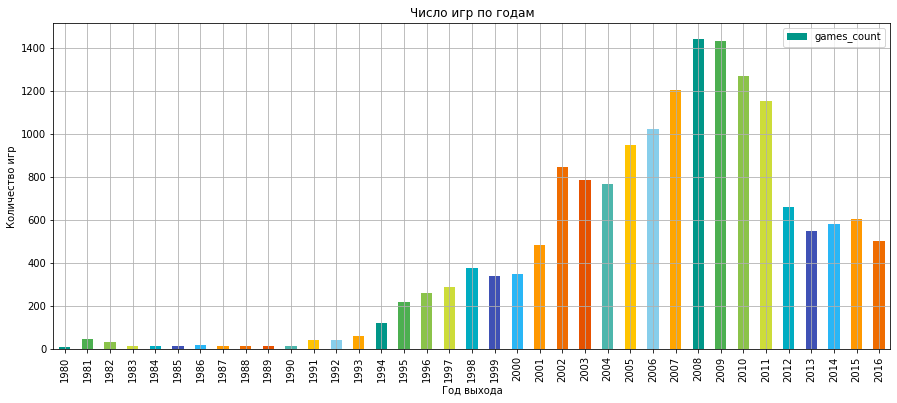

In [16]:
df_year.plot.bar(y = 'games_count', color = ['#009688', '#4caf50', '#8bc34a', '#cddc39', '#00acc1', '#3f51b5',\
'#29b6f6', '#ff9800', '#ef6c00', '#e65100','#4db6ac','#ffc400', 'skyblue','orange'],\
grid = True, figsize = (15,6), title = "Число игр по годам")

plt.ylabel("Количество игр")
plt.xlabel("Год выхода")

Пик выхода видеоигр пришелся на 2008 и 2009 года - 1441 и 1430 игр в год соответственно. Если до 2009 ежегодное количество игр постепенно увеличивалось, то с 2010 года наблюдается падение - за год количество игр уменьшилось практически на 43%. В последующие года небольшой спад сопровождался ростом, поэтому за актуальный период моего исследования я бы приняла отрезок времени с 2012 по 2016 год.

 <a name="9"></a>
#### Как менялись продажи по платформам

Text(0.5, 0, 'Платформа')

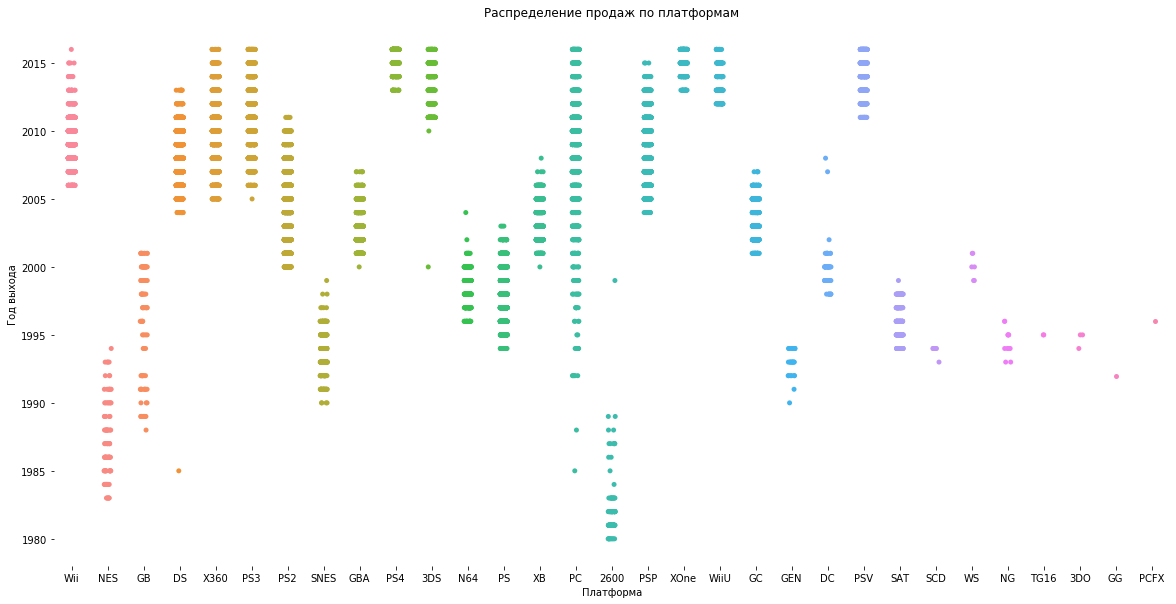

In [17]:
f, ax = plt.subplots(figsize= (20, 10))
sns.despine(bottom = True, left = True)
sns.stripplot(x = 'platform', y = 'year_of_release', data = df)
plt.title("Распределение продаж по платформам")
plt.ylabel("Год выхода")
plt.xlabel("Платформа")

На данном графике виден "срок жизни" платформ, PC существует дольше всех своих конкурентов, за ней по продолжительности существования идут  PS2, PSP и X360, меньше всего по времени функционировали GG и PCFX.

Методом value_counts() найду, суммарное количество игр для каждой платформы за всё время:

In [18]:
df['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Создам сводную таблицу, где одной колонкой будут года, а остальными - разные платформы, а значениями будут продажи игр по годам для каждой платформы.
А затем построю график иллюстрирующий распределение продаж игр по годам для каждой платформы.

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Количество продаж')

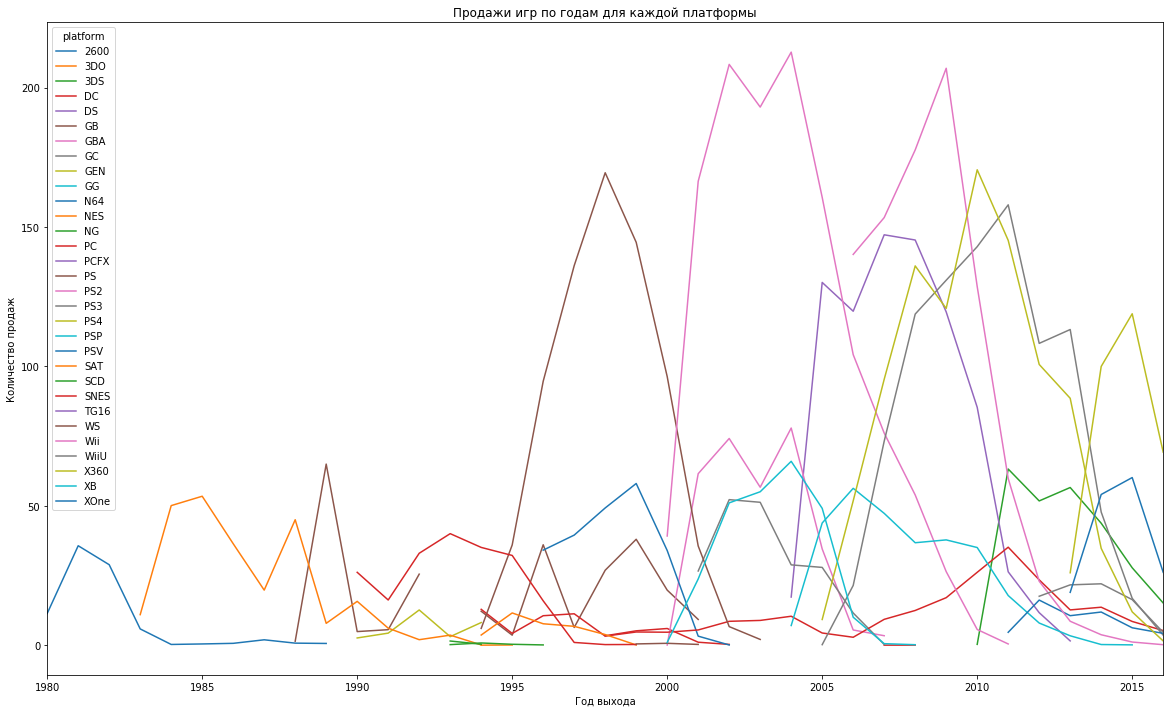

In [19]:
df_platform_1 = df.pivot_table(columns = 'platform', index = 'year_of_release', values = 'sales_total',\
                               aggfunc = 'sum')
display(df_platform_1)

df_platform_1.plot(figsize = (20,12), title = "Продажи игр по годам для каждой платформы")
plt.xlabel("Год выхода")
plt.ylabel("Количество продаж")

По данному графику можно сделать вывод, что всплеск продаж в индустрии видеоигр был в 1998, 2002 и 2004 и 2009 годах. В 2015 лидером по продажам была платформа PS4, к 2016 году продажи упали, но все равно остались выше конкурентов.
В целом на этом графике можно увидеть, что в большинстве случаев с момента появления платформы продажи видеоигр с каждым годом растут, примерно посередине цикла "жизнедеятельности" платформы происходят максимальные продажи, затем показатель продаж идет с каждым годом на спад и в итоге платформа исчезает. 

Рассмотрю на баровом графике любые 5 платформ, чтоб подтвердить предыдущий вывод. Для этого создам срез по  столбцу platform таблицы df методом query(), а затем сводную таблицу со сгруппированными продажами игр по годам для каждой платформы:

Text(0, 0.5, 'Количество продаж')

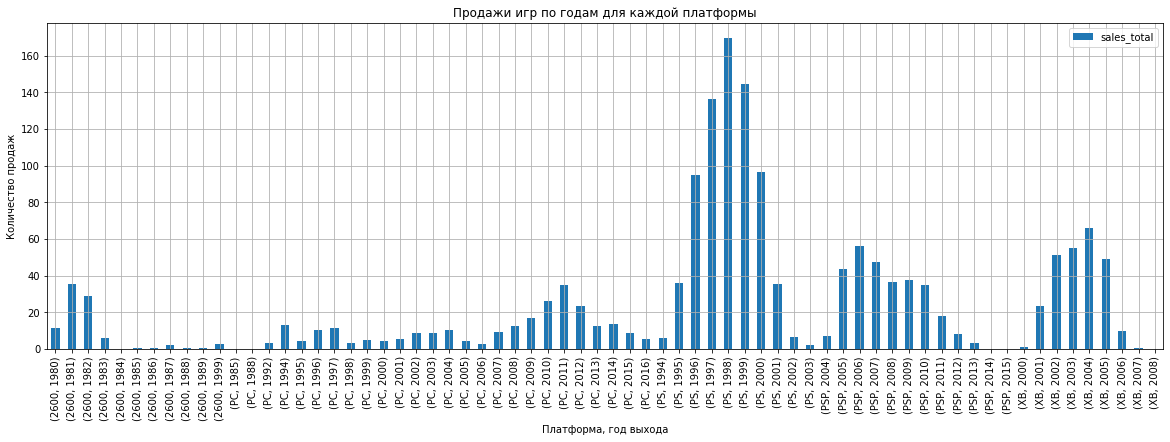

In [20]:
df_platform_2 = df.query('platform == "2600" or platform == "PSP" or platform == "PS" or platform == "XB"\
or platform == "PC"')

df_platform_2_pivot = df_platform_2.pivot_table(index = ['platform', 'year_of_release'],\
                                                           values = 'sales_total' , aggfunc = 'sum')

df_platform_2_pivot.plot.bar(y = 'sales_total', grid = True, figsize = (20,6),\
title = "Продажи игр по годам для каждой платформы")

plt.xlabel("Платформа, год выхода")
plt.ylabel("Количество продаж")

На баровом графике похожая картина, как и на предыдущем - здесь также видны пики продаж примерно посередине цикла жизни платформы. 
На примере 5-ти платформ, взятых из разных этапов развития видеоигр можно сделать вывод, что каждая платформа имеет свой жизненный срок, приблизительно 9 - 12 лет. Также можно наблюдать ежегодный спад продаж перед исчезновением старой платформы - основные фанаты видеоигр и приверженцы определенной платформы уже приобрели все интересующие их игры, успели поиграть и ждут анонса новой более усовершенствованной платформы.

 <a name="10"></a>
#### Определение актуального периода

Возьму за актуальный период последние 5 лет - на таком временном отрезке можно проследить тенденцию к увеличению или, наоборот, снижению продаж и спрогнозировать будущие продажи.

Сделаю срез по таблице df с условием year_of_release >= 2012, результат сохраню в новой таблице под названием df_actual_period. После создам сводную таблицу df_platform_actual_period, в которой будут фигурировать данные продаж по платформам за актуальный период:

In [21]:
df_actual_period = df.query('year_of_release >= 2012')
#display(df_actual_period)

df_platform_actual_period = df_actual_period.pivot_table(index = ['platform'], values = ['sales_total'] ,\
                                                         aggfunc = 'sum').sort_values(by = 'sales_total',\
                                                                                      ascending = False)
display(df_platform_actual_period)

,sales_total
platform,
PS4,314.14
PS3,289.71
X360,237.52
3DS,195.01
XOne,159.32
WiiU,82.19
PC,63.51
PSV,49.18
Wii,36.60


Лидером продаж с 2012 по 2016 года была платформа PS4 - 314.14 миллиона копий, на втором месте - PS3 с 289.71 миллионами продаж, далее идет X360 - 237.52 миллионов, четвертое место у 3DS	- 195.01 миллиона, и закрывает топ-5 платформа XOne с 159.32 миллионами проданных копий.

<a name="11"></a>
#### Выбор нескольких потенциально прибыльных платформ

Создам срез по 5-ти платформам, показавшим самые высокие продажи за актуальный период - последние 5 лет, далее создам сводную таблицу, в которой будут сгруппированы продажи игр по платформам и по годам:

In [22]:
df_platform_actual_period_top_5 = df_actual_period.query('platform == "PS3" or platform == "XOne" or platform == \
"3DS" or platform == "PS4" or platform == "X360"')
#display(df_platform_top_5)

df_platform_actual_top5_sorted = df_platform_actual_period_top_5.pivot_table(index = ['platform',\
'year_of_release'], values = 'sales_total', aggfunc = 'sum')
display(df_platform_actual_top5_sorted)

sales_total
platform year_of_release             
3DS      2012                   51.76
         2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
PS3      2012                  108.28
         2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25
X360     2012                  100.72
         2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

Построю сводную таблицу, колонки которой будут платформы, индексом - год выхода игры, значением - продажи и агрегирующей функцией - метод sum для того, чтобы построить график продаж игр по каждой из топ-5 потенциально прибыльных платформ за последние 5 лет:

Text(0, 0.5, 'Продажи, количество копий')

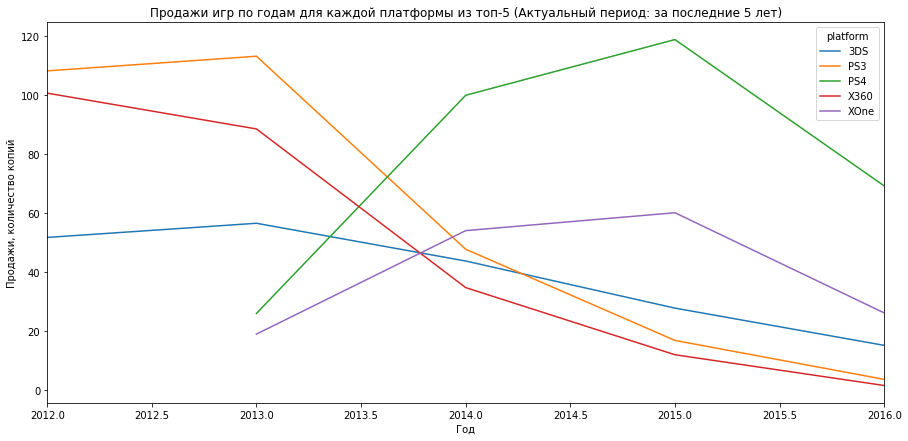

In [23]:
df_platform_actual_top5_1 = df_platform_actual_period_top_5.pivot_table(columns = 'platform', index = \
'year_of_release', values = 'sales_total', aggfunc = 'sum')

df_platform_actual_top5_1.plot(figsize = (15,7),\
title = "Продажи игр по годам для каждой платформы из топ-5 (Актуальный период: за последние 5 лет)")
plt.xlabel("Год")
plt.ylabel("Продажи, количество копий")

На данном графике видны рост, пики продаж и спады немного лучше, чем на графике, где я рассматривала все платформы. Здесь можно сказать, что к 2016 году продажи всех платформ из топ-5 по количеству продаж снизились и в перспективе будут падать в последующие года. 

Построю баровый график, отображающий распределение продаж игр по годам выхода для каждой платформы из топ-5 за последние 5 лет:

Text(0, 0.5, 'Продажи, количество копий')

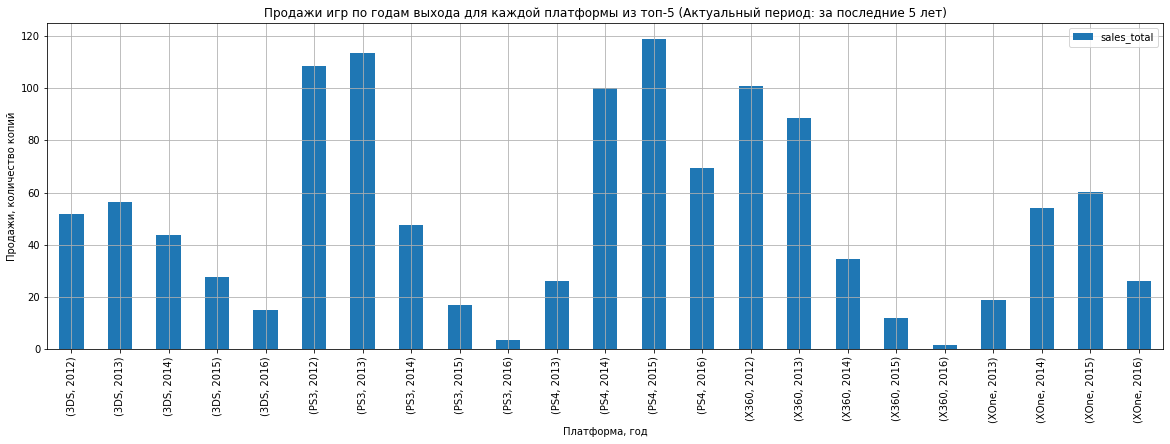

In [24]:
df_platform_actual_top5_sorted.plot.bar(y = 'sales_total', grid = True, figsize = (20,6), title = "Продажи игр \
по годам выхода для каждой платформы из топ-5 (Актуальный период: за последние 5 лет)")
plt.xlabel("Платформа, год")
plt.ylabel("Продажи, количество копий")

В промежутке с 2012 по 2016 год наблюдается следующая ситуация с продажами видеоигр:
1. На платформе PS4 - с момента ее появления (2013 год) за 4 года продажи увеличились с 25.99 до 118.9 миллионов в 2015 году (рост в 3.5 раза), но в 2016 году продажи начали падать - спад почти на 48% по сравнению с предыдущим годом. Возможно это начало конца, судя по моим предыдущим выводам.

2. Соответственно присутствует спад продаж на PS3, - со значения равного 107.36 миллионов копий в 2012 году, с пиком продаж 113.25 миллионов в 2013 году, до 3.6 миллионов в 2016 году, - платформа устаревает, новые игры рассчитаны на PS4, поэтому спрос на PS3 потихоньку исчезает. В 2016 году продажи упали примерно на 79% по сравнению с предыдущим годом.

3. Можно наблюдать спад продаж видеоигр на платформе 3DS. Со значения 51.36 миллионов копий в 2012 году, до 15.14 в 2016 году, с пиком продаж в 2013 году равному 56.57 миллионов. В 2016 году количество проданных копий уменьшилось на 55.5% в сравнении с предыдущим годом.

4. Явно виден ежегодный спад числа проданных копий видеоигр на платформе Х360, с максимального значения в 99.74 миллионов в 2012 году к 2016 году прибыль падает до 1.52 миллионов, - итого за 5 лет происходит падение на 98.5%. С 2015 года количество проданных копий уменьшилось приблизительно на 87% в 2016 году.

5. Продажи на XOne росли с момента даты выпуска на протяжении 3-ех лет. С 18.96 миллионов копий в 2013 году, показатель увеличился до своего максимума - 60.14 миллионов в 2015 году, и в 2016 произошел спад на целых 56.5%.

Потенциально прибыльной платформой является PS4, несмотря на спад продаж за последний год почти на 48%, продажи на этой платформе самые высокие на 2016 год - 69.25 миллионов копий. Но в целом можно сказать, что все существующие на данный момент платформы переживают спад продаж и движутся к своему логическому исчезновению, одни к скорому, такие как PS3 и X360, а другие к медленному - 3DS, XOne.

Также по данному графику можно увидеть, что в настоящее время срок жизни платформ сокращается, новые платформы появляются быстрее, чем допустим лет 10-15 назад.

#### Определение потенциально прибыльных платформ

Построю график «ящик с усами» по глобальным продажам игр в разбивке по платформам, предварительно создав срез по условию sales_total <= 1, чтобы отсортировать выбросы и получить наглядный результат:

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'Платформы')

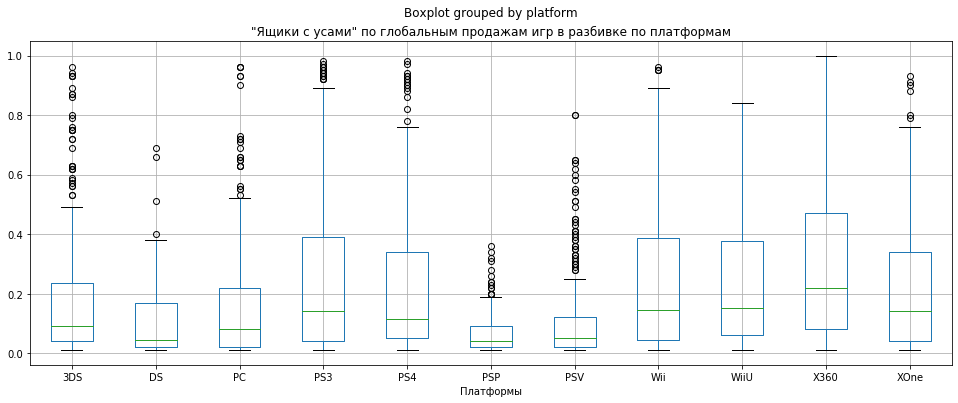

In [25]:
df_actual_period_new = df_actual_period.query('sales_total <= 1')
df_actual_period_new.boxplot('sales_total', by = 'platform', figsize = (16,6))
plt.title('"Ящики с усами" по глобальным продажам игр в разбивке по платформам')
plt.xlabel("Платформы")

Самый высокий показатель медианы глобальной продажи игры у платформы X360, затем идут XOne, WiiU и PS3, самое низкое медианное значение продаж у PSP и DS. Следовательно, PS3 вышла на первое место по суммарному количеству продаж и обогнала всех конкурентов, включая X360, за счет большого числа игр, а не самого большого числа проданных копий, также и PSV и 3DS, являющиеся портаративными консолями, получили такие высокие продажи за счет широкого распостранения(очень распостранены среди подростков) и большого количества игр.
    

<a name="12"></a>
#### Определение влияния отзывов пользователей и критиков на продажи внутри одной популярной платформы

Построю диаграммы рассеяния и посчитаю коэффициенты корреляции между отзывами критиков и продажами, а также 
между пользовательскими отзывами и продажами:

Коэффициент корреляции между отзывами критиков и продажами: 0.19299593904199328
Коэффициент корреляции между отзывами пользователей и продажами: -0.08599027639619483


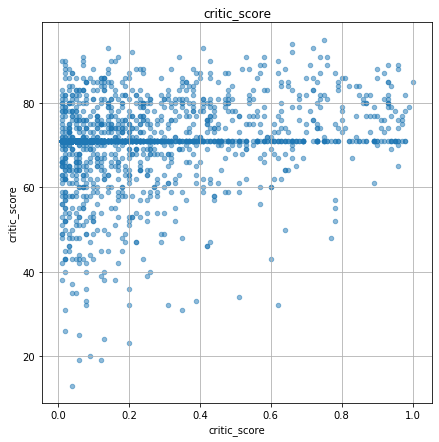

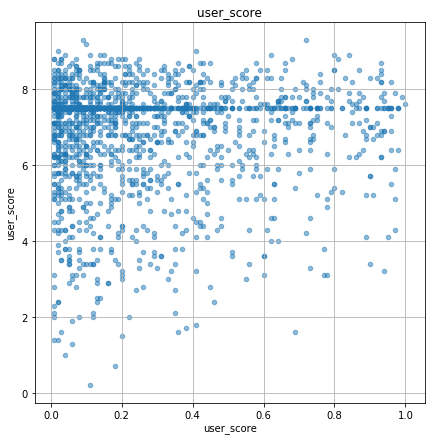

In [26]:
columns = ['critic_score','user_score']
for i in range(len(columns)):
#columns = ['sales_total','last_price','rooms','ceiling_height'] 
    df_actual_period_new.plot(y = columns[i], kind = 'scatter', x = 'sales_total', grid = True, figsize = (7,7),\
                              alpha = 0.5)
    
    plt.title(columns[i])
    plt.xlabel(columns[i])

correlation_critic_sales = df_actual_period_new['sales_total'].corr(df_actual_period_new['critic_score'])
correlation_user_sales = df_actual_period_new['sales_total'].corr(df_actual_period_new['user_score'])
print('Коэффициент корреляции между отзывами критиков и продажами:', correlation_critic_sales)
print('Коэффициент корреляции между отзывами пользователей и продажами:', correlation_user_sales)

Коэффициент корреляции между отзывами критиков и продажами равен приблизительно 0.2 - связь между между этими величинами скорее всего отсутствует. Но на диаграмме рассеяния, на которой изображена зависимость между отзывами критиков и продажами, можно наблюдать плотность около значения 70, - чаще всего проданные игры имеют такую оценку.
Коэффициент корреляции между отзывами пользователей и продажами близок к 0, это означает, что связь практически отсутствует. На диаграмме рассеяния, иллюстрирующей зависимость между отзывами пользователей и продажами, можно наблюдать плотность от 7 до 8 баллов, - чаще всего происходят продажы игр, имеющих оценку в данном диапазоне.

 <a name="13"></a>
#### Pаспределение игр по жанрам

Создам сводную таблицу с жанрами игр, суммарными продажам и количеством продаж. Добавлю в таблицу столбец genre_sales_per_game со средней величиной продажи одной игры в каждом жанре, разделив
сумму общих продаж на количество игр.

In [27]:
df_actual_period_genre = df_actual_period_new.pivot_table(index = ['genre'], values = 'sales_total' ,\
                                                          aggfunc = ['sum','count'])
#Переименую столбцы сводной таблицы с помощью метода replace():
df_actual_period_genre.rename(columns = {'count': 'games_count', 'sum': 'sales_total_genre'}, inplace = True)

df_actual_period_genre['genre_sales_per_game'] = df_actual_period_genre['sales_total_genre'] /\
df_actual_period_genre['games_count']
display(df_actual_period_genre)

,sales_total_genre,games_count,genre_sales_per_game
,sales_total,sales_total,
genre,,,
Action,184.81,940,0.196606
Adventure,24.75,299,0.082776
Fighting,22.09,100,0.220900
Misc,35.46,179,0.198101
Platform,13.66,65,0.210154
Puzzle,3.70,27,0.137037
Racing,17.79,98,0.181531
Role-Playing,65.78,325,0.202400


С помощью метода plot() построю барный график, изображающий среднее количество проданных копий одной игры в каждом жанре:

Text(0.5, 0, 'Жанры')

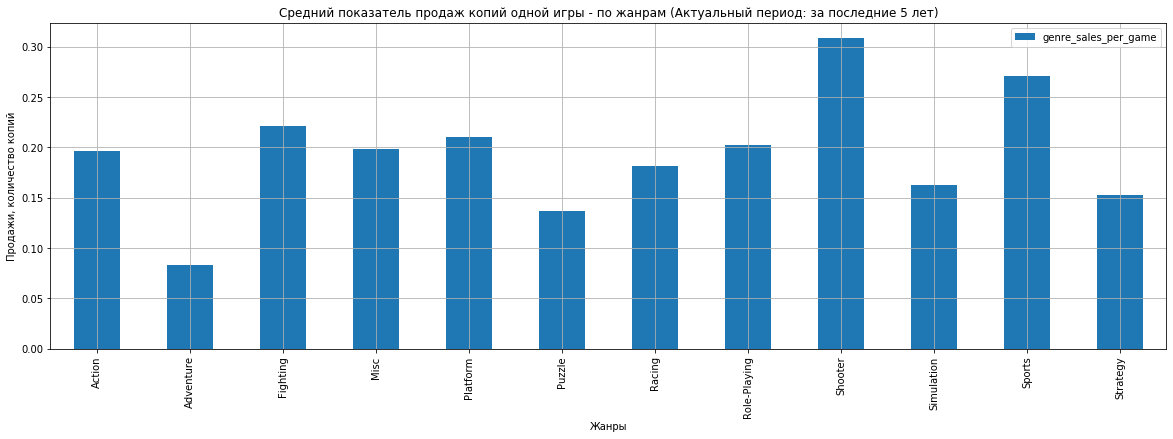

In [28]:
df_actual_period_genre.plot.bar(y = 'genre_sales_per_game', grid = True, figsize = (20,6), \
                    title = "Средний показатель продаж копий одной игры - по жанрам (Актуальный период: за последние 5 лет)")
plt.ylabel('Продажи, количество копий')
plt.xlabel('Жанры')

Самыми востребованными оказались игры жанра Shooter - среднее количество продаж одной игры равны приблизительно 0.3 млн. копий. На втором месте жанр Sports - продажи игры этого жанра в среднем равны 0.27 млн. копий. Далее следует жанр Fighting	со средним количеством проданных копий приблизительно равным 0.22 млн.

Хотя самое большое количество копий игр (184.81 млн.) в период с 2012 по 2016 было продано в жанре Action, показатель средней продажи игры в этом жанре равен 0.2 млн копий. Так что большое количество копий объясняется большим количеством игр жанра Action, а не количеством копий одной игры. 
По сводной таблице мы видим, что количество игр жанра Action 940, а это большой отрыв от других жанров, на втором месте по количеству игр Role-Playing - 325 , Adventure - 299, а у жанра с наибольшим числом проданных копий одной игры, Shooter, - всего 166 игр.

 <a name="14"></a>
## Шаг 4. Составление портрета пользователя каждого региона

<a name="15"></a>
### Самые популярные платформы

Создам сводную таблицу с самыми популярными платформами в Северной Америке, отсортировав столбец na_sales  по убыванию:

In [29]:
na_platform = df_actual_period.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')\
.sort_values(by = 'na_sales', ascending = False)
na_platform['part_na_sales'] = na_platform['na_sales'] * 100 / (na_platform['na_sales'].sum())
display(na_platform.head())

,na_sales,part_na_sales
platform,,
X360,140.57,23.692904
PS4,108.74,18.327996
PS3,103.74,17.485252
XOne,93.12,15.695264
3DS,55.49,9.352773


Создам сводную таблицу с самыми популярными платформами в Европе, отсортировав столбец eu_sales  по убыванию:

In [30]:
eu_platform = df_actual_period.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')\
.sort_values(by = 'eu_sales', ascending = False)
eu_platform['part_eu_sales'] = eu_platform['eu_sales'] * 100 / (eu_platform['eu_sales'].sum())
display(eu_platform.head())

,eu_sales,part_eu_sales
platform,,
PS4,141.09,27.709258
PS3,107.27,21.067206
X360,74.89,14.707962
XOne,51.59,10.131977
3DS,42.83,8.411564


Создам сводную таблицу с самыми популярными платформами в Японии, отсортировав столбец jp_sales  по убыванию:

In [31]:
jp_platform = df_actual_period.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')\
.sort_values(by = 'jp_sales', ascending = False)
jp_platform['part_jp_sales'] = jp_platform['jp_sales'] * 100 / (jp_platform['jp_sales'].sum())
display(jp_platform.head())

,jp_sales,part_jp_sales
platform,,
3DS,87.79,45.529509
PS3,35.29,18.302043
PSV,21.04,10.911731
PS4,15.96,8.277150
WiiU,13.01,6.747225


Построю графики баров с распределением продаж игр по платформам в каждом регионе:

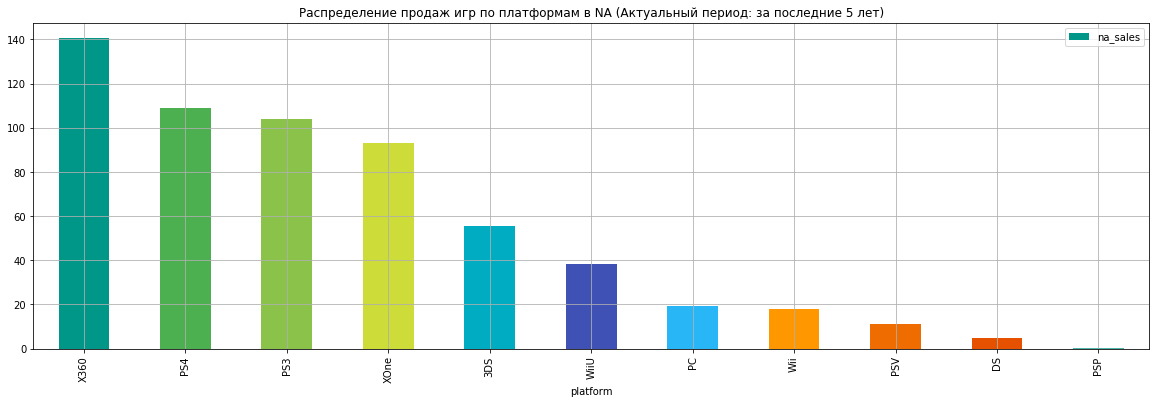

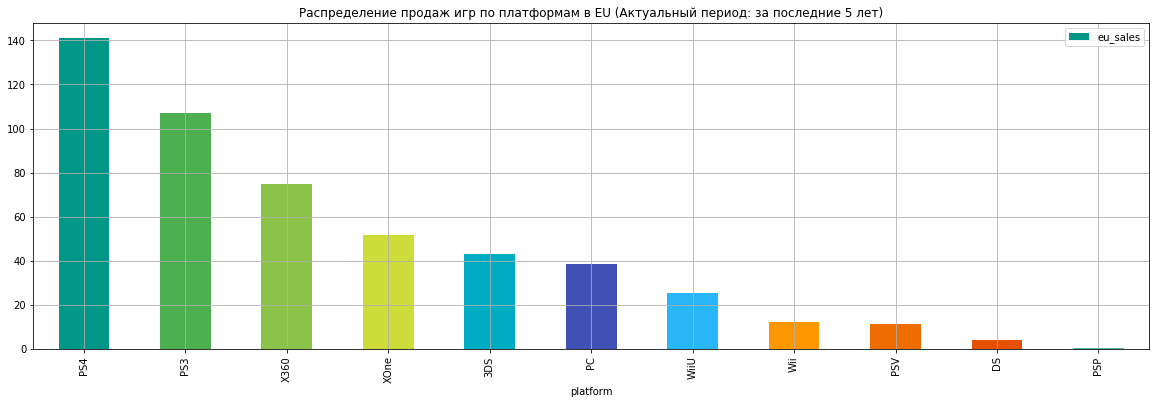

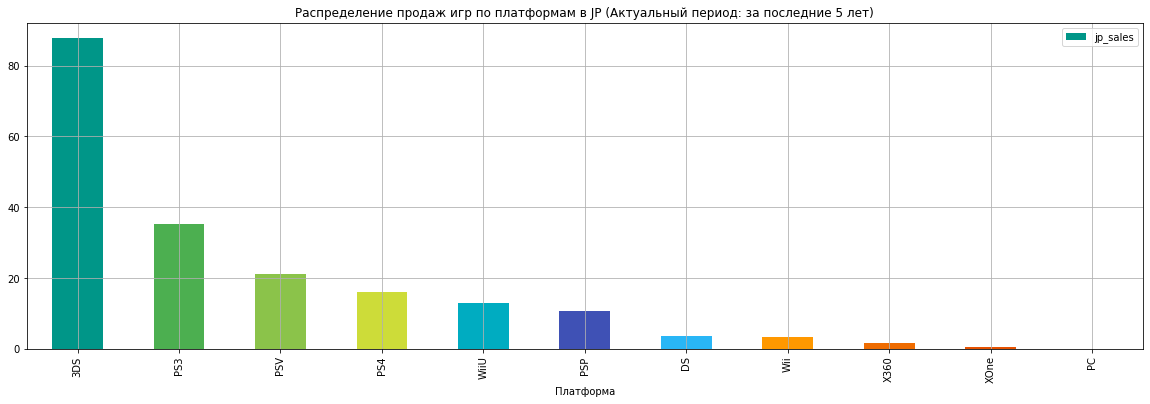

In [32]:
def platform(na_platform, eu_platform, jp_platform):
    
    na_platform = na_platform.plot.bar( y = 'na_sales', grid = True, color = ['#009688', '#4caf50','#8bc34a',\
'#cddc39','#00acc1','#3f51b5', '#29b6f6','#ff9800','#ef6c00','#e65100','#4db6ac'], figsize = (20,6),\
 title = "Распределение продаж игр по платформам в NA (Актуальный период: за последние 5 лет)")
    
    eu_platform = eu_platform.plot.bar( y = 'eu_sales', grid = True, color = ['#009688', '#4caf50', '#8bc34a',\
'#cddc39', '#00acc1', '#3f51b5', '#29b6f6', '#ff9800', '#ef6c00', '#e65100','#4db6ac'], figsize = (20,6),\
title = "Распределение продаж игр по платформам в EU (Актуальный период: за последние 5 лет)")
    
    jp_platform = jp_platform.plot.bar( y = 'jp_sales', grid = True, color = ['#009688', '#4caf50', '#8bc34a',\
'#cddc39', '#00acc1', '#3f51b5', '#29b6f6', '#ff9800', '#ef6c00', '#e65100','#4db6ac'], figsize = (20,6),\
title = "Распределение продаж игр по платформам в JP (Актуальный период: за последние 5 лет)")
    
    plt.xlabel("Платформа")
platform(na_platform, eu_platform, jp_platform)    

По показателям продаж за последние 5 лет самая популярная платформа в Северной Америке - X360, ее доля продаж равна почти 23.7%. Второе место у PS4, ее доля продаж равна приблизительно 18.3%, с небольшим отрывом идет PS3 с долей 17.5% продаж. На четвертом месте XOne - 15.7% продаж, и закрывает топ-5 платформ по количеству продаж в Северной Америке 3DS с показателем почти 9.4% долей продаж.

В Европе распределение продаж по платформам значительно отличается от Северной Америки. Здесь на первом месте платформа PS4, доля продаж - 27.7%, на втором месте PS3 с долей в 21%, а X360 здесь только на третьем месте, её доля 14.7%. Далее следуют XOne и 3DS с долями продаж - 10.1% и 8.4% соответственно.

Показатели продаж в Японии показали отличную картину от Северной Америки и Европы. В Японии первое место по продажам у платформы 3DS, её доля продаж равна целых 45.5%, второе место здесь у PS3 - 18.3% продаж.  Далее идет PSV с долей продаж 10.9%, а PS4 тут только на четвертом месте с 8.3% продаж. Закрывает рейтинг топ-5 платформа WiiU с продажами около 6.8%.

По данному исследованию можно сделать вывод, что в Северной Америке больше любителей Xbox, а в Европе Playstation, мнения жителей разных материков разделились насчет двух вечно конкурирующих платформах. А в Японии больше всего любителей карманных консолей - почти половина игроманов предпочла конкурентам платформу 3DS.

<a name="16"></a>
### Самые популярные жанры

Создам сводную таблицу с самыми популярными жанрами в Северной Америке, отсортировав столбец na_sales  по убыванию. А также в таблице создам новый столбец с долей продаж игр каждого жанра:

In [33]:
na_genre = df_actual_period.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum')\
.sort_values(by = 'na_sales', ascending = False)

na_genre['part_na_sales'] = na_genre['na_sales'] * 100 / (na_genre['na_sales'].sum())
display(na_genre.head())

,na_sales,part_na_sales
genre,,
Action,180.15,30.364065
Shooter,144.79,24.404180
Sports,81.53,13.741783
Role-Playing,64.00,10.787123
Misc,38.19,6.436878


Создам сводную таблицу с самыми популярными жанрами в Европе, отсортировав столбец eu_sales  по убыванию. А также создам новый столбец с долей продаж игр каждого жанра:

In [34]:
eu_genre = df_actual_period.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum')\
.sort_values(by = 'eu_sales', ascending = False)

eu_genre['part_eu_sales'] = eu_genre['eu_sales'] * 100 / (eu_genre['eu_sales'].sum())
display(eu_genre.head())

,eu_sales,part_eu_sales
genre,,
Action,161.70,31.756943
Shooter,113.47,22.284850
Sports,69.09,13.568875
Role-Playing,48.53,9.531011
Racing,27.29,5.359598


Создам сводную таблицу с самыми популярными жанрами в Японии, отсортировав столбец jp_sales  по убыванию. А также создам новый столбец с долей продаж игр каждого жанра:

In [35]:
jp_genre = df_actual_period.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum')\
.sort_values(by = 'jp_sales', ascending = False)

jp_genre['part_jp_sales'] = jp_genre['jp_sales'] * 100 / (jp_genre['jp_sales'].sum())
display(jp_genre.head())

,jp_sales,part_jp_sales
genre,,
Role-Playing,65.44,33.938388
Action,52.80,27.383052
Misc,13.10,6.793901
Simulation,10.41,5.398818
Fighting,9.44,4.895758


Построю графики баров с распределением продаж игр по жанрам в каждом регионе:

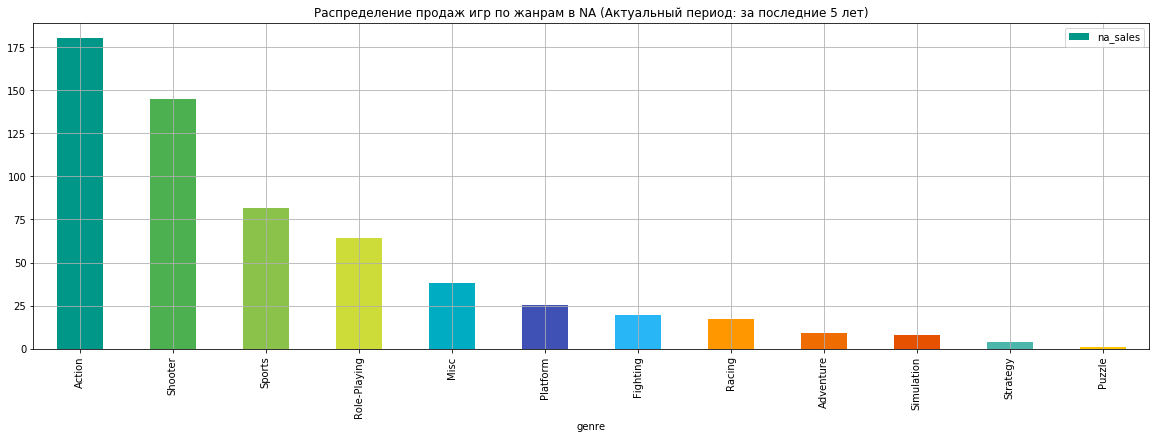

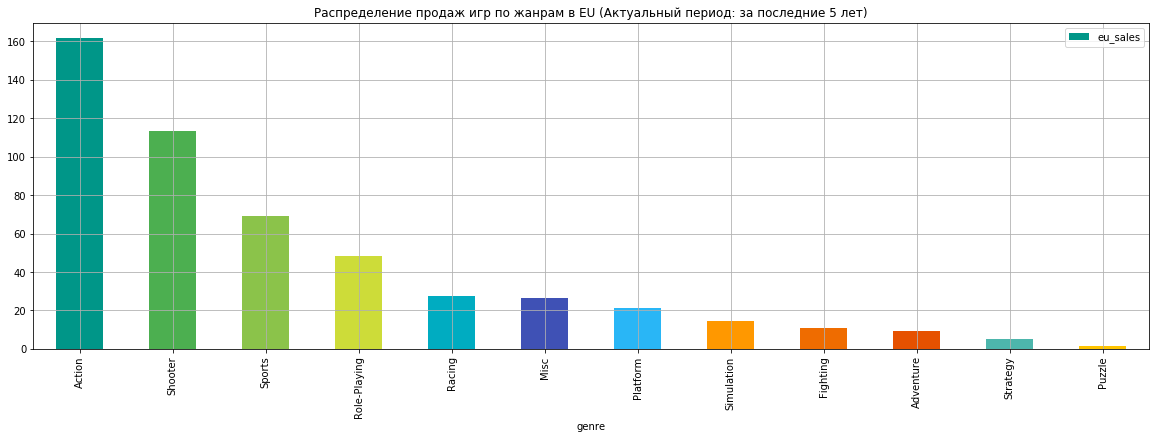

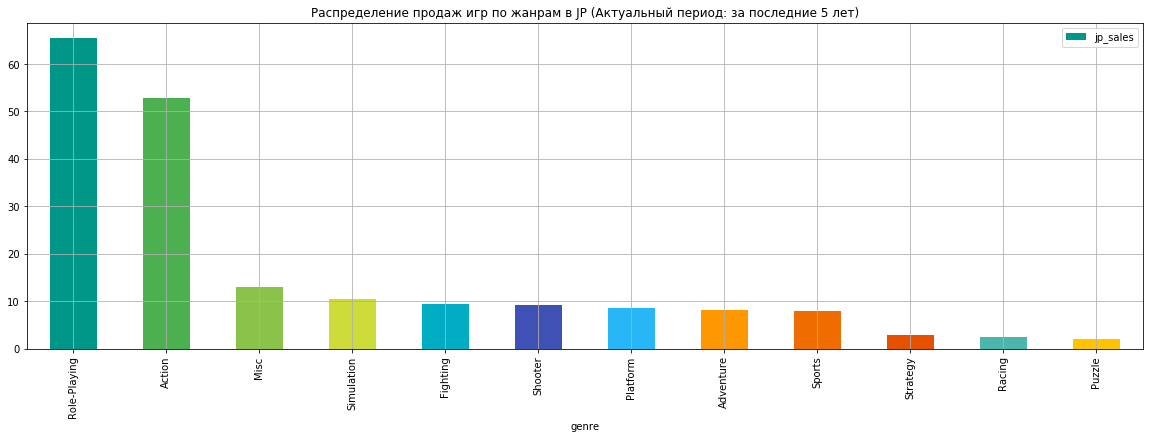

In [36]:
def genre(na_genre, eu_genre, jp_genre):
    
    na_genre = na_genre.plot.bar( y = 'na_sales', grid = True, color = ['#009688', '#4caf50', '#8bc34a',\
    '#cddc39', '#00acc1', '#3f51b5', '#29b6f6', '#ff9800', '#ef6c00', '#e65100','#4db6ac','#ffc400'],\
    figsize = (20,6), title = "Распределение продаж игр по жанрам в NA (Актуальный период: за последние 5 лет)")
    
    eu_genre = eu_genre.plot.bar( y = 'eu_sales', grid = True, color = ['#009688', '#4caf50', '#8bc34a',\
    '#cddc39', '#00acc1', '#3f51b5', '#29b6f6', '#ff9800', '#ef6c00', '#e65100','#4db6ac','#ffc400'],\
    figsize = (20,6), title = "Распределение продаж игр по жанрам в EU (Актуальный период: за последние 5 лет)")
    
    jp_genre = jp_genre.plot.bar( y = 'jp_sales', grid = True, color = ['#009688', '#4caf50', '#8bc34a',\
    '#cddc39', '#00acc1', '#3f51b5', '#29b6f6', '#ff9800', '#ef6c00', '#e65100','#4db6ac','#ffc400'],\
    figsize = (20,6), title = "Распределение продаж игр по жанрам в JP (Актуальный период: за последние 5 лет)")
    
genre(na_genre, eu_genre, jp_genre)    

В Северной Америке и Европе доли распределения продаж по жанрам имеют сходства. В обоих регионах на первых четырех местах по доли продаж по порядку идут жанры Action (Северная Америка - 30.4%, Европа 31.8%), Shooter (Северная Америка - 24.4%, Европа 22.3%), Sports (Северная Америка - 13.7%, Европа 13.6%) и Role-Playing (Северная Америка - 10.8%, Европа 9.5%). А закрывает топ-5 продаж игр по жанрам в Европе жанр Racing с долей 5.4%, а в Северной Америке - Misc с долей продаж равной 6.4%. 
В Японии распределение долей продаж значительно отличается от Европы и Северной Америки, на первом месте здесь жанр Role-Playing, доля продаж 34%; на втором месте - Action с долей 27.4%, далее идут жанры Misc и Simulation с распределением долей 6.8% и 5.4% соответственно. Закрывает пятерку жанр Fighting с долей 4.9% продаж.
Игровые предпочтения в Европе и Северной Америке схожи - больше половины игроков выбирают Экшн и Шутеры, жанры, требующие развитых физических возможностей игрока, в том числе координации рук и скорости реакции; в Японии же вкусы отличаются, большинство здесь предпочитают Ролевые игры, которые основаны на элементах игрового процесса настольных игр и редко полагаются на физическую координацию. 

<a name="17"></a>
### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Создам сводную таблицу с рейтингами игр в Северной Америке, отсортировав столбец na_sales  по убыванию. В новой таблице создам столбец с долей продаж игр по каждому рейтингу:

In [37]:
na_rating = df_actual_period.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum')\
.sort_values(by = 'na_sales', ascending = False)

na_rating['part_na_sales'] = na_rating['na_sales'] * 100 / (na_rating['na_sales'].sum())
display(na_rating.head())

,na_sales,part_na_sales
rating,,
M,231.67,47.280557
E,114.37,23.341293
E10+,77.93,15.904406
T,66.02,13.473744


Создам сводную таблицу с рейтингами игр в Европе, отсортировав столбец eu_sales  по убыванию. В новой таблице создам столбец с долей продаж игр по каждому рейтингу:

In [38]:
eu_rating = df_actual_period.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum')\
.sort_values(by = 'eu_sales', ascending = False)

eu_rating['part_eu_sales'] = eu_rating['eu_sales'] * 100 / (eu_rating['eu_sales'].sum())
display(eu_rating.head())

,eu_sales,part_eu_sales
rating,,
M,194.44,46.552385
E,113.03,27.061387
E10+,57.25,13.706665
T,52.96,12.679563


Создам сводную таблицу с рейтингами игр в Японии, отсортировав столбец jp_sales  по убыванию. В новой таблице создам столбец с долей продаж игр по каждому рейтингу:

In [39]:
jp_rating = df_actual_period.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum')\
.sort_values(by = 'jp_sales', ascending = False)

jp_rating['part_jp_sales'] = jp_rating['jp_sales'] * 100 / (jp_rating['jp_sales'].sum())
display(jp_rating.head())

,jp_sales,part_jp_sales
rating,,
E,28.33,33.830905
T,26.02,31.072367
M,21.20,25.316456
E10+,8.19,9.780272


Построю графики баров с распределением продаж игр по рейтингу в каждом регионе:

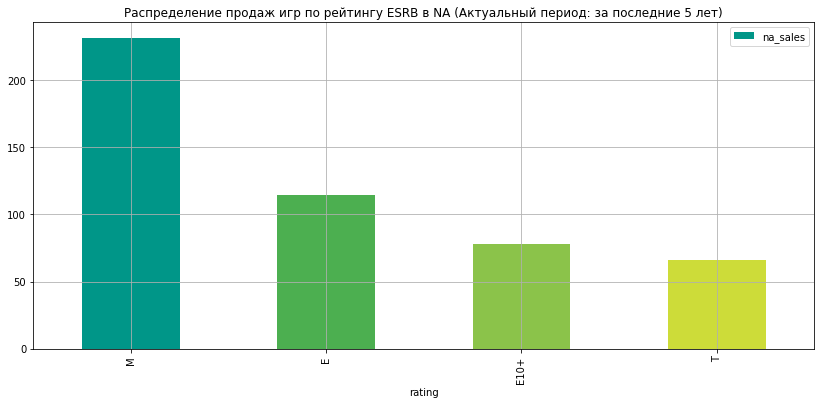

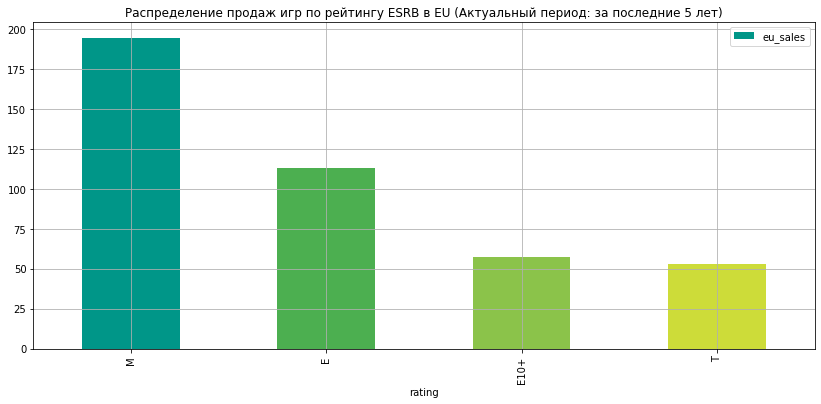

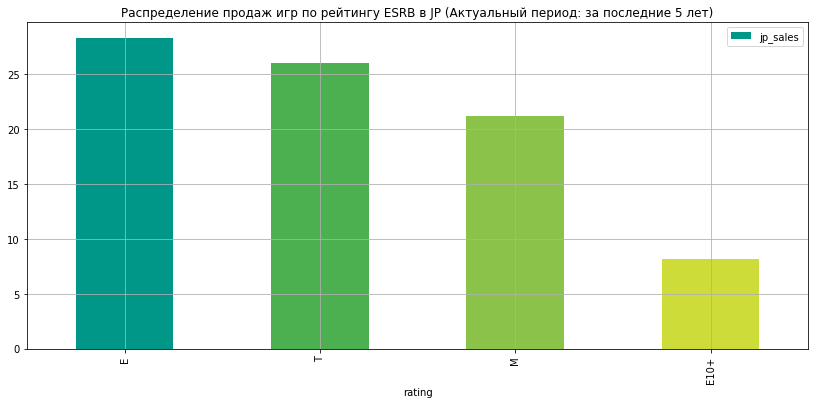

In [40]:
def rating(na_rating, eu_rating, jp_rating):
    
    na_rating = na_rating.plot.bar( y = 'na_sales', grid = True, color = ['#009688', '#4caf50', '#8bc34a',\
    '#cddc39'], figsize = (14,6),\
    title = "Распределение продаж игр по рейтингу ESRB в NA (Актуальный период: за последние 5 лет)")
    
    eu_rating = eu_rating.plot.bar( y = 'eu_sales', grid = True, color = ['#009688', '#4caf50', '#8bc34a',\
    '#cddc39'], figsize = (14,6),\
    title = "Распределение продаж игр по рейтингу ESRB в EU (Актуальный период: за последние 5 лет)")
    
    jp_rating = jp_rating.plot.bar( y = 'jp_sales', grid = True, color = ['#009688', '#4caf50', '#8bc34a',\
    '#cddc39'], figsize = (14,6),\
    title = "Распределение продаж игр по рейтингу ESRB в JP (Актуальный период: за последние 5 лет)")
    
rating(na_rating, eu_rating, jp_rating)    

Распределение продаж в зависимости от рейтинга ESRB в Северной Америке и Европе довольно схоже - в обоих регионах игроки предпочитают игры рейтинга "Mature" - "Для взрослых", доли соответственно равны 47.3% и 46.6%. Затем следует рейтинг "Everyone" - "Для всех" с долями продаж равными 23.3% в Северной Америке и 27.1% в Европе. На третьем месте рейтинг "Everyone 10 and older" - "От 10 лет и старше", доля в Северной Америке - 15.9%, и в Европе - 13.7%. Четвертое место досталось рейтингу "Teen" - "Подросткам" или играм, подходящим для лиц от 13 лет и старше, доли продаж в Северной Америке и Европе соответственно равняются 13.5% и 12.7%.
Япония здесь тоже отличилась от других регионов - самая большая доля продаж здесь у игр с рейтингом "Everyone 10 and older" - 33.8%, далее идет рейтинг "Teen" с долей продаж 31%, а рейтинг "Mature" здесь лишь на третьем месте с долей равной 25.3%. В конце списка здесь "Everyone 10 and older", доля продаж - 9.8%.

### Отличие пользовательских рейтингов платформ Xbox One и PC

С помощью метода query() создам 2 среза по столбцу "platform" таблицы df_actual_period_new по условиям 
platform == "XOne" и platform == "PC":

In [41]:
df_xbox = df_actual_period_new.query('platform == "XOne"')
df_pc = df_actual_period_new.query('platform == "PC"')

Построю диаграмму размаха для столбца user_score таблицы df_xbox, чтобы получить "ящик с усами" и увидеть выбросы по пользовательскому рейтингу платформы Xbox One:

count    196.000000
mean       6.837245
std        1.267742
min        1.600000
25%        6.300000
50%        7.450000
75%        7.500000
max        8.900000
Name: user_score, dtype: float64

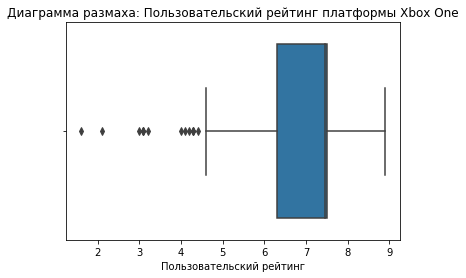

In [42]:
sns.boxplot(df_xbox['user_score'])
plt.title("Диаграмма размаха: Пользовательский рейтинг платформы Xbox One")
plt.xlabel("Пользовательский рейтинг")
#Методом describe() получу характерные значения столбца user_score: 
df_xbox['user_score'].describe()

Присутствуют выбросы примерно ниже значения 4.5, которые повлияли на среднее (6.84), но не на медиану (7.45). Отсортирую выбросы.

С помощью метода query() построю срез для столбца user_score таблицы df_xbox, чтобы отсортировать выбросы для платформы Xbox One: 

count    182.000000
mean       7.095055
std        0.859865
min        4.600000
25%        6.700000
50%        7.500000
75%        7.500000
max        8.900000
Name: user_score, dtype: float64

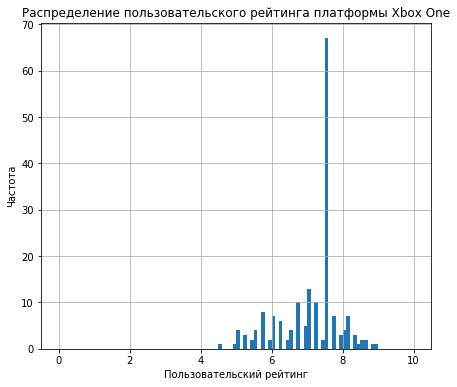

In [43]:
df_xbox_sorted = df_xbox.query('user_score > 4.5')

df_xbox_sorted['user_score'].plot(y = 'user_score', kind = 'hist', bins = 100, grid = True, figsize = (7,6),\
                                  range = (0, 10), title = "Распределение пользовательского рейтинга платформы Xbox One")
plt.xlabel("Пользовательский рейтинг")
plt.ylabel("Частота")
df_xbox_sorted['user_score'].describe()

После сортировки выбросов среднее значение пользовательского рейтинга платформы Xbox выросло до 7.1 со значения 6.84, но все еще осталось меньше медианного значения. На гистограмме хорошо видна медиана, равная 7.5. Медианное значение более точно характеризует данную выборку.

Построю диаграмму размаха для столбца user_score таблицы df_pc, чтобы получить "ящик с усами" и увидеть выбросы по 
пользовательскому рейтингу платформы PC:

count    243.000000
mean       6.673251
std        1.529566
min        1.400000
25%        5.900000
50%        7.300000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

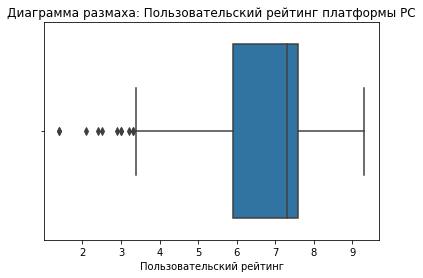

In [44]:
sns.boxplot(df_pc['user_score'])
plt.title("Диаграмма размаха: Пользовательский рейтинг платформы PC")
plt.xlabel("Пользовательский рейтинг")
#Методом describe() получу характерные значения столбца user_score: 
df_pc['user_score'].describe()

На диаграмме размаха видны выбросы примерно ниже значения 3.3, которые повлияли на среднее (6.66), но не на медиану (7.3). Отсортирую выбросы.

С помощью метода query() построю срез для столбца user_score таблицы df_pc, чтобы отсортировать выбросы для платформы PC. После этого построю гистограмму, иллюстрирующую распределение пользовательского рейтинга платформы PC.

count    232.000000
mean       6.866810
std        1.264285
min        3.400000
25%        6.075000
50%        7.400000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

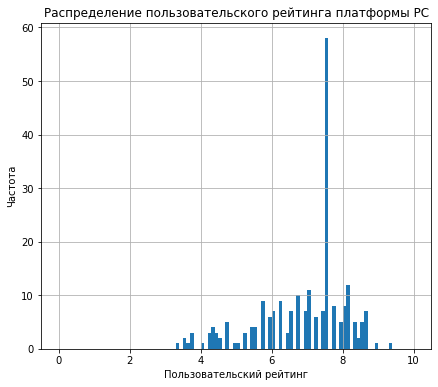

In [45]:
df_pc_sorted = df_pc.query('user_score > 3.3')

df_pc_sorted['user_score'].plot(y = 'user_score', kind = 'hist', bins = 100, grid = True, figsize = (7,6),\
                                range = (0, 10), title = "Распределение пользовательского рейтинга платформы PC")
plt.xlabel("Пользовательский рейтинг")
plt.ylabel("Частота")
df_pc_sorted['user_score'].describe()

После сортировки выбросов от низких значений у нас увеличилось не только среднее с 6.66 до 6.86, но и медианное значение с 7.3 выросло до 7.4, видимо выбросов было очень много, раз они повлияли на медиану. Медиана более точно описывает выборку.

По результатам анализа пользовательского рейтинга платформ Xbox One и PC, я обнаружила, что медианное значение пользовательского рейтинга этих двух платформ отличается на 1.4%(у Xbox One пользовательский рейтинг - 7.5, у PC - 7.4)

### Отличие пользовательских рейтингов жанров Action и Sports

С помощью метода query() создам 2 среза по столбцу "genre" таблицы df_actual_period_new по условиям genre == "Action" и genre == "Sports":

In [46]:
df_action = df_actual_period_new.query('genre == "Action"')
df_sports = df_actual_period_new.query('genre == "Sports"')

Построю диаграмму размаха для столбца user_score таблицы df_action, чтобы получить "ящик с усами" и увидеть выбросы по пользовательскому рейтингу жанра Action:

count    940.000000
mean       7.161277
std        1.022781
min        1.600000
25%        7.200000
50%        7.500000
75%        7.500000
max        8.800000
Name: user_score, dtype: float64

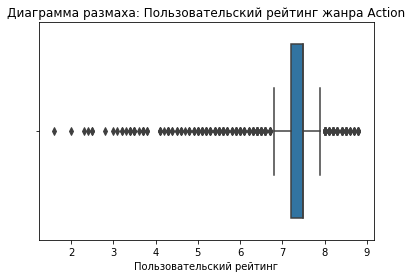

In [47]:
sns.boxplot(df_action['user_score'])
plt.title("Диаграмма размаха: Пользовательский рейтинг жанра Action")
plt.xlabel("Пользовательский рейтинг")
#Методом describe() получу характерные значения столбца user_score: 
df_action['user_score'].describe()

На диаграмме размаха видны выбросы примерно ниже значения 6.8 и выше 7.9. Отсортирую выбросы и построю гистаграмму распределения пользовательского рейтинга жанра Action.

С помощью метода query() построю срез для столбца user_score таблицы df_pc, чтобы отсортировать выбросы для платформы PC. Затем построю гистограмму с распределением пользовательского рейтинга жанра Action.

count    663.000000
mean       7.472097
std        0.146530
min        6.900000
25%        7.500000
50%        7.500000
75%        7.500000
max        7.800000
Name: user_score, dtype: float64

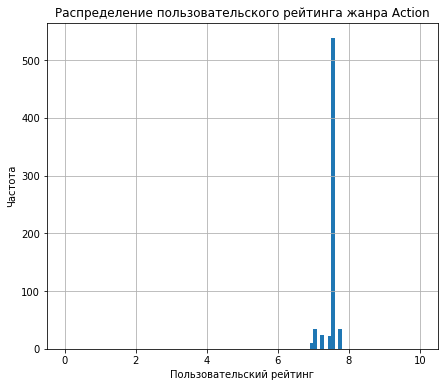

In [48]:
df_action_sorted = df_action.query('6.8 < user_score < 7.9')

df_action_sorted['user_score'].plot(y = 'user_score', kind = 'hist', bins = 100, grid = True, figsize = (7,6),\
                                    range = (0, 10), title = "Распределение пользовательского рейтинга жанра Action")
plt.xlabel("Пользовательский рейтинг")
plt.ylabel("Частота")
df_action_sorted['user_score'].describe()

После сортировки низких и высоких значений выбросов, среднее выросло до 7.47 с 7.16, медианное значение осталось прежним - 7.5.

Построю диаграмму размаха для столбца user_score таблицы df_sports, чтобы получить "ящик с усами" и увидеть выбросы по пользовательскому рейтингу жанра Sports:

count    219.000000
mean       6.105936
std        1.812472
min        0.200000
25%        5.100000
50%        6.900000
75%        7.500000
max        8.800000
Name: user_score, dtype: float64

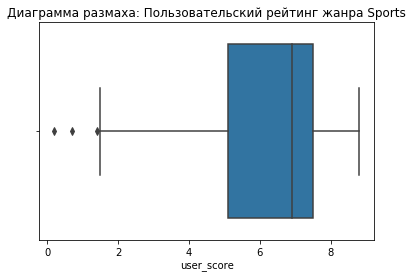

In [49]:
sns.boxplot(df_sports['user_score'])
plt.title("Диаграмма размаха: Пользовательский рейтинг жанра Sports")
#Методом describe() получу характерные значения столбца user_score: 
df_sports['user_score'].describe()

На диаграмме размаха наблюдаются выбросы примерно ниже значения 1.5, сказавшиеся на среднем (6.1), но не на медиане (6.9). Отсортирую выбросы и построю гистограмму распределения пользовательского рейтинга жанра Sports.

С помощью метода query() построю срез для столбца user_score таблицы df_pc, чтобы отсортировать выбросы для платформы PC. После построю гистограмму распределения пользовательского рейтинга жанра Sports.

count    214.000000
mean       6.223364
std        1.657850
min        1.700000
25%        5.225000
50%        6.900000
75%        7.500000
max        8.800000
Name: user_score, dtype: float64

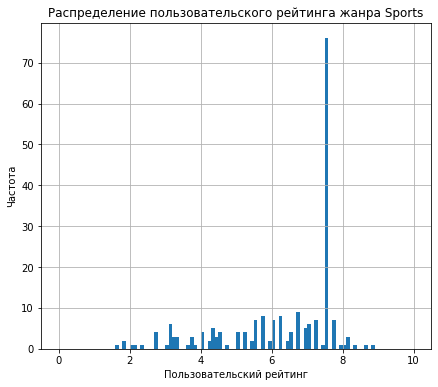

In [50]:
df_sports_sorted = df_sports.query('1.6 < user_score')

df_sports_sorted['user_score'].plot(y = 'user_score', kind = 'hist', bins = 100, grid = True, figsize = (7,6),\
                                    range = (0, 10), title = "Распределение пользовательского рейтинга жанра Sports")
plt.xlabel("Пользовательский рейтинг")
plt.ylabel("Частота")
df_sports_sorted['user_score'].describe()

После сортировки выбросов пользовательского рейтинга жанра Sports среднее значение увеличилось с 6.1 до 6.22, медиана равна 6.9, это значение точнее описывает выборку. 

По итогам анализа пользовательского рейтинга в зависимости от жанра - Action и Sports, я пришла к выводу, что медианное значение пользовательского рейтинга жанра Sports, равного 6.9, на 8% ниже медианного значения жанра Action, равного 7.5.

 <a name="18"></a>
## Шаг 5. Проверка гипотез

 <a name="19"></a>
### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

По условию нужно проверить гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Нулевая гипотеза всегда формулируется так, чтобы использовать знак "=".

Сформулирую нулевую и альтернативную гипотезы о равенстве средних 2-ух генеральных совокупностей:

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC отличаются.

Есть смысл решать вопрос о принятии или отвержении нулевой гипотезы по p-value. Это вероятность получить наблюдаемый или ещё более далёкий от предполагаемого результат при условии, что нулевая гипотеза верна.

Чтобы проверить нулевую гипотезу сравним средние значения пользовательского рейтинга отдельно для двух платформ - Xbox One и PC, как для двух генеральных совокупностей, применив метод scipy.stats.ttest_ind(array1, array2, equal_var).

In [51]:
#Рассчитаю дисперсию для столбца user_score таблицы df_xbox с помощью метода np.var():
user_score_xbox_variance = np.var(df_xbox_sorted['user_score'], ddof = 1).round(1)
#Рассчитаю дисперсию для столбца user_score таблицы df_pc с помощью метода np.var():
user_score_pc_variance = np.var(df_pc_sorted['user_score'], ddof = 1).round(1)

print('Дисперсия пользовательского рейтинга Xbox One:', user_score_xbox_variance)
print('Дисперсия пользовательского рейтинга PC:', user_score_pc_variance)

Дисперсия пользовательского рейтинга Xbox One: 0.7
Дисперсия пользовательского рейтинга PC: 1.6


In [52]:
#Задам критический уровень статистической значимости равный 0.01 - если p-value окажется меньше него - отвергнем гипотезу:
alpha= 0.01

#Дисперсии не равны, поэтому equal_var придадим значение False:
results = st.ttest_ind(df_xbox_sorted['user_score'], df_pc_sorted['user_score'], equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.02976114250269804
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу, так как p-значение получилось больше критического уровня статистической значимости. Нет оснований отвергать нулевую гипотезу - средние пользовательские рейтинги платформ Xbox One и PC скорее всего не отличаются.

 <a name="20"></a>
### Средние пользовательские рейтинги жанров Action и Sports разные

По условию нужно проверить гипотезу: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Нулевая гипотеза всегда формулируется так, чтобы использовать знак "=".

Сформулирую нулевую и альтернативную гипотезы о равенстве средних 2-ух генеральных совокупностей:

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые; 

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.

In [53]:
#Рассчитаю дисперсию для столбца user_score таблицы df_action с помощью метода np.var():
user_score_action_variance = np.var(df_action['user_score'], ddof = 1).round(1)
#Рассчитаю дисперсию для столбца user_score таблицы df_sports с помощью метода np.var():
user_score_sports_variance = np.var(df_sports['user_score'], ddof = 1).round(1)

print('Дисперсия пользовательского рейтинга жанра Action:', user_score_action_variance)
print('Дисперсия пользовательского рейтинга жанра Sports:', user_score_sports_variance)


Дисперсия пользовательского рейтинга жанра Action: 1.0
Дисперсия пользовательского рейтинга жанра Sports: 3.3


In [54]:
#Задам критический уровень статистической значимости равный 0.01 - если p-value окажется меньше него - отвергнем гипотезу:
alpha= 0.01

#Дисперсии не равны, поэтому equal_var придадим значение False:
results = st.ttest_ind(df_action['user_score'], df_sports['user_score'], equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 5.879742631936973e-15
Отвергаем нулевую гипотезу


Полученное значение p-value меньше заданного уровня статистической значимости, поэтому мы отвергаем нулевую гипотезу. Следовательно, средние пользовательские рейтинги жанров Action и Sports разные.

 <a name="21"></a>
### Шаг 6. Общий вывод

Я провела исследование данных о продажах игр, оценки пользователей и экспертов, жанров, платформ и пришла к следующим выводам:

1.Пик выхода видеоигр пришелся на 2008 и 2009 года - 1441 и 1430 игр в год соответственно. Если до 2009 ежегодное количество игр постепенно увеличивалось, то с 2010 года наблюдается падение - за год количество игр уменьшилось практически на 43%. В последующие года спад периодически сопровождался небольшим ростом.

2. Основные всплески продаж в индустрии видеоигр были в 1998, 2002 и 2004 и 2009 годах. В 2015 лидером по продажам была платформа PS4, к 2016 году продажи упали, но все равно остались выше конкурентов.

3. Пики продаж наблюдаются примерно посередине цикла жизни платформы. На примере 5-ти платформ, взятых из разных этапов развития видеоигр можно сделать вывод, что каждая платформа имеет свой "жизненный срок" - приблизительно 9 - 12 лет. В большинстве случаев с момента появления платформы продажи видеоигр с каждым годом растут. Примерно посередине цикла "жизнедеятельности" платформы происходят максимальные продажи, затем показатель продаж идет с каждым годом на спад, и в итоге платформа исчезает - ,видимо, основные фанаты видеоигр и приверженцы определенной платформы уже приобрели все интересующие их игры, успели поиграть и ждут анонса новой более усовершенствованной платформы.

4. В результате исследования актуального периода, промежутка времени с 2012 по 2016 год, выявила следующие особенности:

    На платформе PS4 - с момента ее появления (2013 год) за 4 года продажи увеличились с 26 до 118.9 миллионов копий в 2015 году (рост в 3.5 раза), но в 2016 году продажи начали падать - спад почти на 48% по сравнению с предыдущим годом. Возможно это начало конца, судя по моим предыдущим выводам - пик продаж позади.

    Присутствует спад продаж на PS3, - со значения равного 107.36 миллионов копий в 2012 году, с пиком продаж 113.25 миллионов в 2013 году, до 3.6 миллионов в 2016 году, - платформа устаревает, новые игры рассчитаны на PS4, поэтому спрос на PS3 потихоньку исчезает. В 2016 году продажи упали примерно на 79% по сравнению с предыдущим годом.

    Можно наблюдать спад продаж видеоигр на платформе 3DS. Со значения 51.36 миллионов копий в 2012 году, до 15.14 в 2016 году, с пиком продаж в 2013 году равному 56.57 миллионов. В 2016 году количество проданных копий уменьшилось на 55.5% в сравнении с предыдущим годом.

    Явно виден ежегодный спад числа проданных копий видеоигр на платформе Х360, с максимального значения в 99.74 миллионов в 2012 году к 2016 году прибыль падает до 1.52 миллионов, - итого за 5 лет происходит падение на 98.5%. С 2015 к 2016 году количество проданных копий уменьшилось приблизительно на 87%.

    Продажи на XOne росли с момента даты выпуска на протяжении 3-ех лет. С 18.96 миллионов копий в 2013 году, показатель увеличился до своего максимума - 60.14 миллионов в 2015 году, а в 2016 произошел спад на целых 56.5%.

Потенциально прибыльной платформой из 5-ти вышеперечисленных можно считать PS4, несмотря на спад продаж за последний год почти на 48%, продажи на этой платформе самые высокие на 2016 год - 69.25 миллионов копий. Но в целом можно сказать, что все существующие на данный момент платформы переживают спад продаж и движутся к своему логическому исчезновению, одни к скорому, такие как PS3 и X360, а другие к медленному - 3DS, XOne.

Также на примере актуального периода равного последним 5-ти годам можно подметить, что в настоящее время срок существования платформ сокращается, новые платформы появляются, а старые исчезают быстрее, чем допустим лет 10-15 назад.

5. Коэффициент корреляции между отзывами критиков и продажами равен приблизительно 0.2 - связь между между этими величинами скорее всего отсутствует. Но на диаграмме рассеяния, на которой изображена зависимость между отзывами критиков и продажами, можно наблюдать плотность около значения 70, - чаще всего проданные игры имеют такую оценку. Коэффициент корреляции между отзывами пользователей и продажами близок к 0, это означает, что связь практически отсутствует. На диаграмме рассеяния, иллюстрирующей зависимость между отзывами пользователей и продажами, можно наблюдать плотность от 7 до 8 баллов, - чаще всего происходят продажы игр, имеющих оценку в данном диапазоне.

6. Самыми востребованными оказались игры жанра Shooter - среднее количество продаж одной игры равны приблизительно 0.3 млн. копий. На втором месте жанр Sports - продажи игры этого жанра в среднем равны 0.27 млн. копий. Далее следует жанр Fighting со средним количеством проданных копий приблизительно равным 0.22 млн.

Хотя самое большое количество копий игр (184.81 млн.) в период с 2012 по 2016 было продано в жанре Action, показатель средней продажи игры в этом жанре равен 0.2 млн копий. Так что большое количество копий объясняется большим количеством игр жанра Action, а не количеством копий одной игры, количество игр жанра Action равно 940, а это большой отрыв от других жанров, на втором месте по количеству игр Role-Playing - 325 , Adventure - 299, у жанра с наибольшим числом проданных копий одной игры, Shooter, - всего 166 игр.

7. По показателям продаж за последние 5 лет самая популярная платформа в Северной Америке - X360, ее доля продаж равна почти 23.7%. Второе место у PS4, ее доля продаж равна приблизительно 18.3%, с небольшим отрывом идет PS3 с долей 17.5% продаж. На четвертом месте XOne - 15.7% продаж, и закрывает топ-5 платформ по количеству продаж в Северной Америке 3DS с показателем почти 9.4% долей продаж.

В Европе распределение продаж по платформам значительно отличается от Северной Америки. Здесь на первом месте платформа PS4, доля продаж - 27.7%, на втором месте PS3 с долей в 21%, а X360 здесь только на третьем месте, её доля 14.7%. Далее следуют XOne и 3DS с долями продаж - 10.1% и 8.4% соответственно.

Показатели продаж в Японии показали отличную картину от Северной Америки и Европы. В Японии первое место по продажам у платформы 3DS, её доля продаж равна целых 45.5%, второе место здесь у PS3 - 18.3% продаж. Далее идет PSV с долей продаж 10.9%, а PS4 тут только на четвертом месте с 8.3% продаж. Закрывает рейтинг топ-5 платформа WiiU с продажами около 6.8%.

По выше изложенным данным можно сделать вывод, что в Северной Америке больше любителей Xbox, а в Европе Playstation, мнения жителей разных материков разделились насчет двух вечно конкурирующих платформах. А в Японии больше всего любителей карманных консолей - почти половина игроманов предпочла конкурентам платформу 3DS.

8. В Северной Америке и Европе доли распределения продаж по жанрам имеют сходства. В обоих регионах на первых четырех местах по доли продаж по порядку идут жанры Action (Северная Америка - 30.4%, Европа 31.8%), Shooter (Северная Америка - 24.4%, Европа 22.3%), Sports (Северная Америка - 13.7%, Европа 13.6%) и Role-Playing (Северная Америка - 10.8%, Европа 9.5%). А закрывает топ-5 продаж игр по жанрам в Европе жанр Racing с долей 5.4%, а в Северной Америке - Misc с долей продаж равной 6.4%. В Японии распределение долей продаж значительно отличается от Европы и Северной Америки, на первом месте здесь жанр Role-Playing, доля продаж 34%; на втором месте - Action с долей 27.4%, далее идут жанры Misc и Simulation с распределением долей 6.8% и 5.4% соответственно. Закрывает пятерку жанр Fighting с долей 4.9% продаж. Игровые предпочтения в Европе и Северной Америке схожи - больше половины игроков выбирают Экшн и Шутеры, жанры, требующие развитых физических возможностей игрока, в том числе координации рук и скорости реакции; в Японии же вкусы отличаются, большинство здесь предпочитают Ролевые игры, которые основаны на элементах игрового процесса настольных игр и редко полагаются на физическую координацию.

9. Распределение продаж в зависимости от рейтинга ESRB в Северной Америке и Европе довольно схоже - в обоих регионах игроки предпочитают игры рейтинга "Mature" - "Для взрослых", доли соответственно равны 47.3% и 46.6%. Затем следует рейтинг "Everyone" - "Для всех" с долями продаж равными 23.3% в Северной Америке и 27.1% в Европе. На третьем месте рейтинг "Everyone 10 and older" - "От 10 лет и старше", доля в Северной Америке - 15.9%, и в Европе - 13.7%. Четвертое место досталось рейтингу "Teen" - "Подросткам" или играм, подходящим для лиц от 13 лет и старше, доли продаж в Северной Америке и Европе соответственно равняются 13.5% и 12.7%. Япония здесь тоже отличилась от других регионов - самая большая доля продаж здесь у игр с рейтингом "Everyone 10 and older" - 33.8%, далее идет рейтинг "Teen" с долей продаж 31%, а рейтинг "Mature" здесь лишь на третьем месте с долей равной 25.3%. В конце списка здесь "Everyone 10 and older", доля продаж - 9.8%.

10. По результатам анализа пользовательского рейтинга платформ Xbox One и PC, я обнаружила, что медианное значение пользовательского рейтинга этих двух платформ отличается на 1.4% (у Xbox One пользовательский рейтинг - 7.5, у PC - 7.4)

11. По итогам анализа пользовательского рейтинга в зависимости от жанра - Action и Sports, я пришла к выводу, что медианное значение пользовательского рейтинга жанра Sports, равного 6.9, на 8% ниже медианного значения жанра Action, равного 7.5.

12. Сформулировала гипотезу, звучащую следующим образом: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые", которую не получилось отвергнуть, поэтому средние пользовательские рейтинги платформ Xbox One и PC скорее всего не отличаются (что и доказывает различие медианных значений всего на 1.4%).

13. Сформулировала следующую гипотезу: "Средние пользовательские рейтинги жанров Action и Sports разные". В результате сравнения средних выборок из 2-ух генеральных совокупностей, подтвердила, что средние пользовательские рейтинги жанров Action и Sports разные (что доказывает различие медианных значений на 8%).

В качестве рекомендации для маркетингового отдела, прошу учесть результаты моего исследования в планировании рекламных кампаний на 2017 год.